In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import sys
import random
import statsmodels.api as sm
from statsmodels.formula.api import ols
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [43]:
!pip install statsmodels xgboost openpyxl xgb

ERROR: Could not find a version that satisfies the requirement xgb (from versions: none)
ERROR: No matching distribution found for xgb
You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
df = pd.read_excel('2022-train-v2.xlsx')

In [45]:
#df_label1=df.iloc[:,0]
#df_label2=df.iloc[:,1]
#df_label3=df.iloc[:,2]
#df_label4=df.iloc[:,3]
#df_label5=df.iloc[:,4]
#df_label6=df.iloc[:,5]

In [3]:
df_train=df.iloc[:,:]#df.iloc[:,6:]

In [4]:
df_train.head(10)

,sensor_point5_i_value,sensor_point6_i_value,sensor_point7_i_value,sensor_point8_i_value,sensor_point9_i_value,sensor_point10_i_value,clean_temp,clean_ec,clean_ph4,clean_ph5,clean_ph7,clean_ph8,clean_pressure11,clean_pressure12,clean_pressure21,clean_pressure22,clean_pressure23,clean_pressure31,clean_pressure33,clean_pressure41,clean_pressure42,clean_pressure51,clean_pressure52,clean_pressure61,clean_pressure62,clean_pressure71,clean_pressure72,clean_pressure81,clean_pressure82,clean_pressure91,clean_pressure92,clean_pressure101,clean_pressure102,oven_pa1,oven_pa2,oven_pb1,oven_pb2,oven_a1,oven_a2,oven_a3,oven_b1,oven_b2,oven_b3,painting_g1_act_a_air,painting_g1_act_f_air,painting_g1_act_t_air,painting_g1_act_hvv,painting_g1_act_hvc,painting_g2_act_a_air,painting_g2_act_f_air,painting_g2_act_t_air,painting_g2_act_hvv,painting_g2_act_hvc,painting_g3_act_a_air,painting_g3_act_f_air,painting_g3_act_t_air,painting_g3_act_hvv,painting_g3_act_hvc,painting_g4_act_a_air,painting_g4_act_f_air,painting_g4_act_t_air,painting_g4_act_hvv,painting_g4_act_hvc,painting_g5_act_a_air,painting_g5_act_f_air,painting_g5_act_t_air,painting_g5_act_hvv,painting_g5_act_hvc,painting_g6_act_a_air,painting_g6_act_f_air,painting_g6_act_t_air,painting_g6_act_hvv,painting_g6_act_hvc,painting_g7_act_a_air,painting_g7_act_f_air,painting_g7_act_t_air,painting_g7_act_hvv,painting_g7_act_hvc,painting_g8_act_a_air,painting_g8_act_f_air,painting_g8_act_t_air,painting_g8_act_hvv,painting_g8_act_hvc,painting_g9_act_a_air,painting_g9_act_f_air,painting_g9_act_t_air,painting_g9_act_hvv,painting_g9_act_hvc,painting_g10_act_a_air,painting_g10_act_f_air,painting_g10_act_t_air,painting_g10_act_hvv,painting_g10_act_hvc,painting_g11_act_a_air,painting_g11_act_f_air,painting_g11_act_t_air,painting_g11_act_hvv,painting_g11_act_hvc,painting_g12_act_a_air,painting_g12_act_f_air,painting_g12_act_t_air,painting_g12_act_hvv,painting_g12_act_hvc,env_rpi05_hum,env_rpi05_pm1,env_rpi05_pm10,env_rpi05_pm25,env_rpi05_temp,env_rpi07_hum,env_rpi07_pm1,env_rpi07_pm10,env_rpi07_pm25,env_rpi07_temp,env_rpi09_hum,env_rpi09_lux,env_rpi09_pm1,env_rpi09_pm10,env_rpi09_pm25,env_rpi09_temp,env_rpi14_hum,env_rpi14_lux,env_rpi14_pm1,env_rpi14_pm10,env_rpi14_pm25,env_rpi14_temp,env_rpi15_hum,env_rpi15_lux,env_rpi15_pm1,env_rpi15_pm10,env_rpi15_pm25,env_rpi15_temp
0,42,56,82,41,73,45,41.1,12.4,NaN,NaN,NaN,6.9,820.24,1262.82,883.46,630.74,640.79,509.75,716.48,1065.79,817.12,833.01,604.20,1139.10,648.61,707.22,1196.38,903.51,825.09,905.59,742.77,414.85,455.39,175.85,203.06,207.45,198.49,174.87,207.38,211.92,190.48,215.01,207.86,7.65,140.93,258.92,56.37,18.78,7.21,150.62,261.26,52.50,23.83,7.03,141.84,255.23,51.51,25.17,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.71,137.76,253.80,56.69,11.20,7.15,137.10,253.00,53.26,23.84,7.23,137.79,254.08,56.60,18.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.24,60.33,75.83,69.50,29.05,48.98,11.33,17.16,14.16,26.21,0.0,0.0,0.0,0.0,0.0,0.0,48.96,0.0,26.33,47.50,37.33,34.41,43.73,0.50,29.50,51.50,42.00,34.78
1,37,60,58,40,64,42,41.1,12.4,NaN,NaN,NaN,6.9,820.15,1263.00,883.60,630.70,640.80,509.70,716.50,1065.90,817.05,833.05,604.20,1139.05,648.60,706.95,1196.60,903.60,825.15,905.40,742.80,414.65,455.25,176.00,203.01,207.40,198.35,174.85,207.37,211.90,190.42,215.02,207.85,7.09,125.88,231.92,51.55,17.10,7.04,146.06,253.31,50.61,23.45,7.13,137.42,247.36,49.82,24.54,0.4,5.41,9.48,1.9,1.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.73,123.67,227.93,50.22,9.93,6.41,128.27,236.76,50.10,21.90,6.40,128.93,237.57,53.60,17.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.24,60.33,75.83,69.50,29.05,48.98,11.33,17.16,14.16,26.21,0.0,0.0,0.0,0.0,0.0,0.0,48.96,0.0,26.33,47.50,37.33,34.41,43.73,0.50,29.50,51.50,42.00,34.78
2,35,66,62,39,86,45,41.1,12.4,NaN,NaN,NaN,6.9,820.15,1263.00,883.60,630.70,640.80,509.70,716.50,1065.90,817.05,833.05,604.20,1139.05,648.60,706.95,1196.60,903.60,825.15,905.40,742.80,414.65,455.25,176.00,203.01,2

In [48]:
#for i in range(len(df_train.columns)):
    #df_train[df_train.columns[i]] = pd.to_numeric(df_train[df_train.columns[i]], errors='coerce')

In [84]:
df_train.isnull().any()

sensor_point5_i_value     False
sensor_point6_i_value     False
sensor_point7_i_value     False
sensor_point8_i_value     False
sensor_point9_i_value     False
sensor_point10_i_value    False
clean_temp                False
clean_ec                  False
clean_ph4                  True
clean_ph5                  True
clean_ph7                  True
clean_ph8                 False
clean_pressure11          False
clean_pressure12          False
clean_pressure21          False
clean_pressure22          False
clean_pressure23          False
clean_pressure31          False
clean_pressure33          False
clean_pressure41          False
clean_pressure42          False
clean_pressure51          False
clean_pressure52          False
clean_pressure61          False
clean_pressure62          False
clean_pressure71          False
clean_pressure72          False
clean_pressure81          False
clean_pressure82          False
clean_pressure91          False
clean_pressure92          False
clean_pr

In [5]:
#df_train.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df_train['clean_ph4'].fillna(value=df_train['clean_ph4'].mean(), inplace=True)
df_train['clean_ph5'].fillna(value=df_train['clean_ph5'].mean(), inplace=True)
df_train['clean_ph7'].fillna(value=df_train['clean_ph7'].mean(), inplace=True)
df_train['clean_ph8'].fillna(value=df_train['clean_ph8'].mean(), inplace=True)

In [6]:
#df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df['clean_ph4'].fillna(value=df['clean_ph4'].mean(), inplace=True)
df['clean_ph5'].fillna(value=df['clean_ph5'].mean(), inplace=True)
df['clean_ph7'].fillna(value=df['clean_ph7'].mean(), inplace=True)
df['clean_ph8'].fillna(value=df['clean_ph8'].mean(), inplace=True)

In [87]:
df_train.describe()

,sensor_point5_i_value,sensor_point6_i_value,sensor_point7_i_value,sensor_point8_i_value,sensor_point9_i_value,sensor_point10_i_value,clean_temp,clean_ec,clean_ph4,clean_ph5,clean_ph7,clean_ph8,clean_pressure11,clean_pressure12,clean_pressure21,clean_pressure22,clean_pressure23,clean_pressure31,clean_pressure33,clean_pressure41,clean_pressure42,clean_pressure51,clean_pressure52,clean_pressure61,clean_pressure62,clean_pressure71,clean_pressure72,clean_pressure81,clean_pressure82,clean_pressure91,clean_pressure92,clean_pressure101,clean_pressure102,oven_pa1,oven_pa2,oven_pb1,oven_pb2,oven_a1,oven_a2,oven_a3,oven_b1,oven_b2,oven_b3,painting_g1_act_a_air,painting_g1_act_f_air,painting_g1_act_t_air,painting_g1_act_hvv,painting_g1_act_hvc,painting_g2_act_a_air,painting_g2_act_f_air,painting_g2_act_t_air,painting_g2_act_hvv,painting_g2_act_hvc,painting_g3_act_a_air,painting_g3_act_f_air,painting_g3_act_t_air,painting_g3_act_hvv,painting_g3_act_hvc,painting_g4_act_a_air,painting_g4_act_f_air,painting_g4_act_t_air,painting_g4_act_hvv,painting_g4_act_hvc,painting_g5_act_a_air,painting_g5_act_f_air,painting_g5_act_t_air,painting_g5_act_hvv,painting_g5_act_hvc,painting_g6_act_a_air,painting_g6_act_f_air,painting_g6_act_t_air,painting_g6_act_hvv,painting_g6_act_hvc,painting_g7_act_a_air,painting_g7_act_f_air,painting_g7_act_t_air,painting_g7_act_hvv,painting_g7_act_hvc,painting_g8_act_a_air,painting_g8_act_f_air,painting_g8_act_t_air,painting_g8_act_hvv,painting_g8_act_hvc,painting_g9_act_a_air,painting_g9_act_f_air,painting_g9_act_t_air,painting_g9_act_hvv,painting_g9_act_hvc,painting_g10_act_a_air,painting_g10_act_f_air,painting_g10_act_t_air,painting_g10_act_hvv,painting_g10_act_hvc,painting_g11_act_a_air,painting_g11_act_f_air,painting_g11_act_t_air,painting_g11_act_hvv,painting_g11_act_hvc,painting_g12_act_a_air,painting_g12_act_f_air,painting_g12_act_t_air,painting_g12_act_hvv,painting_g12_act_hvc,env_rpi05_hum,env_rpi05_pm1,env_rpi05_pm10,env_rpi05_pm25,env_rpi05_temp,env_rpi07_hum,env_rpi07_pm1,env_rpi07_pm10,env_rpi07_pm25,env_rpi07_temp,env_rpi09_hum,env_rpi09_lux,env_rpi09_pm1,env_rpi09_pm10,env_rpi09_pm25,env_rpi09_temp,env_rpi14_hum,env_rpi14_lux,env_rpi14_pm1,env_rpi14_pm10,env_rpi14_pm25,env_rpi14_temp,env_rpi15_hum,env_rpi15_lux,env_rpi15_pm1,env_rpi15_pm10,env_rpi15_pm25,env_rpi15_temp
count,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.00000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.00000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000
mean,79.234646,92.929134,110.897638,80.311811,88.499213,92.125984,47.775591,13.052756,8.920086,7.659742,7.250143,6.996031,746.008472,1393.967402,971.089008,838.239906,727.680583,569.532693,853.137764,787.681465,936.628472,81

In [7]:
cor = df.corr()

In [8]:
cor[:6]

,sensor_point5_i_value,sensor_point6_i_value,sensor_point7_i_value,sensor_point8_i_value,sensor_point9_i_value,sensor_point10_i_value,clean_temp,clean_ec,clean_ph4,clean_ph5,clean_ph7,clean_ph8,clean_pressure11,clean_pressure12,clean_pressure21,clean_pressure22,clean_pressure23,clean_pressure31,clean_pressure33,clean_pressure41,clean_pressure42,clean_pressure51,clean_pressure52,clean_pressure61,clean_pressure62,clean_pressure71,clean_pressure72,clean_pressure81,clean_pressure82,clean_pressure91,clean_pressure92,clean_pressure101,clean_pressure102,oven_pa1,oven_pa2,oven_pb1,oven_pb2,oven_a1,oven_a2,oven_a3,oven_b1,oven_b2,oven_b3,painting_g1_act_a_air,painting_g1_act_f_air,painting_g1_act_t_air,painting_g1_act_hvv,painting_g1_act_hvc,painting_g2_act_a_air,painting_g2_act_f_air,painting_g2_act_t_air,painting_g2_act_hvv,painting_g2_act_hvc,painting_g3_act_a_air,painting_g3_act_f_air,painting_g3_act_t_air,painting_g3_act_hvv,painting_g3_act_hvc,painting_g4_act_a_air,painting_g4_act_f_air,painting_g4_act_t_air,painting_g4_act_hvv,painting_g4_act_hvc,painting_g5_act_a_air,painting_g5_act_f_air,painting_g5_act_t_air,painting_g5_act_hvv,painting_g5_act_hvc,painting_g6_act_a_air,painting_g6_act_f_air,painting_g6_act_t_air,painting_g6_act_hvv,painting_g6_act_hvc,painting_g7_act_a_air,painting_g7_act_f_air,painting_g7_act_t_air,painting_g7_act_hvv,painting_g7_act_hvc,painting_g8_act_a_air,painting_g8_act_f_air,painting_g8_act_t_air,painting_g8_act_hvv,painting_g8_act_hvc,painting_g9_act_a_air,painting_g9_act_f_air,painting_g9_act_t_air,painting_g9_act_hvv,painting_g9_act_hvc,painting_g10_act_a_air,painting_g10_act_f_air,painting_g10_act_t_air,painting_g10_act_hvv,painting_g10_act_hvc,painting_g11_act_a_air,painting_g11_act_f_air,painting_g11_act_t_air,painting_g11_act_hvv,painting_g11_act_hvc,painting_g12_act_a_air,painting_g12_act_f_air,painting_g12_act_t_air,painting_g12_act_hvv,painting_g12_act_hvc,env_rpi05_hum,env_rpi05_pm1,env_rpi05_pm10,env_rpi05_pm25,env_rpi05_temp,env_rpi07_hum,env_rpi07_pm1,env_rpi07_pm10,env_rpi07_pm25,env_rpi07_temp,env_rpi09_hum,env_rpi09_lux,env_rpi09_pm1,env_rpi09_pm10,env_rpi09_pm25,env_rpi09_temp,env_rpi14_hum,env_rpi14_lux,env_rpi14_pm1,env_rpi14_pm10,env_rpi14_pm25,env_rpi14_temp,env_rpi15_hum,env_rpi15_lux,env_rpi15_pm1,env_rpi15_pm10,env_rpi15_pm25,env_rpi15_temp
sensor_point5_i_value,1.000000,0.307827,0.224339,0.227889,0.216599,0.277529,0.099723,-0.048158,-0.065834,-0.028784,0.071311,-0.124583,-0.154683,0.148407,0.063878,0.267112,0.199995,0.204132,0.141782,-0.303189,0.292708,-0.261370,0.247470,-0.341611,0.202463,0.150005,-0.404690,-0.148533,0.025857,-0.016948,0.241423,-0.392224,0.056804,-0.150159,-0.137342,-0.127505,-0.114566,0.092459,0.036567,0.035804,-0.058767,-0.035007,-0.027475,0.124314,0.095123,0.120037,0.080639,0.032551,-0.096878,-0.125965,-0.108839,-0.214767,-0.187143,-0.135417,-0.296487,-0.175995,-0.325913,-0.218602,0.068276,0.038649,0.057189,-0.000551,0.126094,0.282860,0.225173,0.280647,0.235716,0.211853,0.014634,0.022911,0.012983,0.014288,0.009216,0.144940,0.135934,0.138732,0.133277,0.140038,-0.079833,0.031897,-0.064077,-0.108964,-0.202487,-0.151741,-0.287851,-0.131145,-0.318145,-0.068258,0.062174,0.106277,0.092806,0.103480,0.044434,0.250821,0.281840,0.253921,0.275577,0.094932,0.012534,0.012311,0.012034,0.008460,0.010641,-0.408817,-0.030281,-0.094351,-0.082635,0.299578,-0.247398,-0.007080,-0.072763,-0.025444,0.286521,0.345912,0.200799,0.151858,0.145258,0.145055,0.461624,-0.049214,0.223094,-0.198639,-0.176357,-0.204260,0.010446,-0.226225,0.245353,-0.220410,-0.213633,-0.213425,0.246953
sensor_point6_i_value,0.307827,1.000000,0.395594,0.068939,0.333173,0.341876,0.083590,0.199808,-0.073427,-0.024430,0.123789,0.306952,-0.004236,-0.350996,0.058759,0.170477,-0.131028,-0.073215,-0.197646,-0.399603,0.000953,-0.203171,0.084756,-0.254306,-0.043685,-0.110881,-0.338818,-0.203295,0.068578,0.046337,0.157568,-0.141823,-0.323317,0.040726,-0.131107,-0.002596,0.024482,0.337145,0.291906,0.324560,0.144754,0.03

In [9]:
cor.iloc[0,1]

0.30782695438573904

In [10]:
cor_max=[]
col = cor.columns
for i in range(6):
    for j in range(i+1,cor.shape[1]):
        #print(cor.iloc[i,j])
        if (cor.iloc[i,j]>0.4) &(col[j] not in col[:6]):
            #print(cor.iloc[i,j])
            cor_max.append((col[i],col[j]))

In [92]:
cor_max

[('sensor_point5_i_value', 'env_rpi09_temp'),
 ('sensor_point8_i_value', 'clean_pressure23'),
 ('sensor_point8_i_value', 'clean_pressure31'),
 ('sensor_point8_i_value', 'clean_pressure33'),
 ('sensor_point8_i_value', 'painting_g5_act_a_air'),
 ('sensor_point8_i_value', 'painting_g5_act_f_air'),
 ('sensor_point8_i_value', 'painting_g5_act_t_air'),
 ('sensor_point8_i_value', 'painting_g5_act_hvv'),
 ('sensor_point8_i_value', 'painting_g5_act_hvc'),
 ('sensor_point8_i_value', 'painting_g11_act_hvc'),
 ('sensor_point8_i_value', 'env_rpi07_pm1'),
 ('sensor_point8_i_value', 'env_rpi07_pm25'),
 ('sensor_point8_i_value', 'env_rpi09_pm1'),
 ('sensor_point8_i_value', 'env_rpi09_pm10'),
 ('sensor_point8_i_value', 'env_rpi09_pm25')]

In [11]:
rel_col=[]
for k in cor_max:
    #print(k[1])
    if k[1] not in rel_col:
        rel_col.append(k[1])
len(rel_col)

15

In [11]:
rel_col

['env_rpi09_temp',
 'clean_pressure23',
 'clean_pressure31',
 'clean_pressure33',
 'painting_g5_act_a_air',
 'painting_g5_act_f_air',
 'painting_g5_act_t_air',
 'painting_g5_act_hvv',
 'painting_g5_act_hvc',
 'painting_g11_act_hvc',
 'env_rpi07_pm1',
 'env_rpi07_pm25',
 'env_rpi09_pm1',
 'env_rpi09_pm10',
 'env_rpi09_pm25']

In [12]:
df_label1=df_train.iloc[:,0]
df_label2=df_train.iloc[:,1]
df_label3=df_train.iloc[:,2]
df_label4=df_train.iloc[:,3]
df_label5=df_train.iloc[:,4]
df_label6=df_train.iloc[:,5]
df_label_all=df_train.iloc[:,:6]
#df_train=df_train[rel_col]

In [13]:
df_label6.shape

(635,)

In [62]:
#e04.drop(e04['painting_g5_act_a_air'].idxmax(),inplace=True)

In [63]:
df_train.shape

(635, 131)

In [64]:
for i in df.columns.values:
    print(i,end=' +')

sensor_point5_i_value +sensor_point6_i_value +sensor_point7_i_value +sensor_point8_i_value +sensor_point9_i_value +sensor_point10_i_value +clean_temp +clean_ec +clean_ph4 +clean_ph5 +clean_ph7 +clean_ph8 +clean_pressure11 +clean_pressure12 +clean_pressure21 +clean_pressure22 +clean_pressure23 +clean_pressure31 +clean_pressure33 +clean_pressure41 +clean_pressure42 +clean_pressure51 +clean_pressure52 +clean_pressure61 +clean_pressure62 +clean_pressure71 +clean_pressure72 +clean_pressure81 +clean_pressure82 +clean_pressure91 +clean_pressure92 +clean_pressure101 +clean_pressure102 +oven_pa1 +oven_pa2 +oven_pb1 +oven_pb2 +oven_a1 +oven_a2 +oven_a3 +oven_b1 +oven_b2 +oven_b3 +painting_g1_act_a_air +painting_g1_act_f_air +painting_g1_act_t_air +painting_g1_act_hvv +painting_g1_act_hvc +painting_g2_act_a_air +painting_g2_act_f_air +painting_g2_act_t_air +painting_g2_act_hvv +painting_g2_act_hvc +painting_g3_act_a_air +painting_g3_act_f_air +painting_g3_act_t_air +painting_g3_act_hvv +painting_

In [65]:
#deviate=int(len(df_train)*0.05)
#for j in range(deviate):
    #df_train.drop(df_train['env_rpi09_temp'].idxmax(),inplace=True)

In [13]:


n6=ols('sensor_point6_i_value ~ env_rpi15_pm25+env_rpi09_temp +clean_pressure23+clean_pressure31+clean_pressure33+painting_g5_act_a_air+painting_g5_act_f_air+painting_g5_act_t_air+painting_g5_act_hvv+env_rpi07_pm1+env_rpi07_pm10+env_rpi07_pm25+env_rpi09_pm1+env_rpi09_pm10+env_rpi09_pm25', data=df).fit() #Specify C for Categorical
n6=sm.stats.anova_lm(n6, typ=2)
n7=ols('sensor_point7_i_value ~ env_rpi15_pm25+env_rpi09_temp +clean_pressure23+clean_pressure31+clean_pressure33++painting_g5_act_a_air+painting_g5_act_f_air+painting_g5_act_t_air+painting_g5_act_hvv+env_rpi07_pm1+env_rpi07_pm10+env_rpi07_pm25+env_rpi09_pm1+env_rpi09_pm10+env_rpi09_pm25', data=df).fit() #Specify C for Categorical
n7=sm.stats.anova_lm(n7, typ=2)
n8=ols('sensor_point8_i_value ~ env_rpi09_temp +clean_pressure23+clean_pressure31+clean_pressure33+painting_g5_act_a_air+painting_g5_act_f_air+painting_g5_act_t_air+painting_g5_act_hvv+env_rpi07_pm1+env_rpi07_pm10+env_rpi07_pm25+env_rpi09_pm1+env_rpi09_pm10+env_rpi09_pm25', data=df).fit() #Specify C for Categorical
n8=sm.stats.anova_lm(n8, typ=2)
n9=ols('sensor_point9_i_value ~ env_rpi09_temp +clean_pressure23+clean_pressure31+clean_pressure33+painting_g5_act_a_air+painting_g5_act_f_air+painting_g5_act_t_air+painting_g5_act_hvv+env_rpi07_pm1+env_rpi07_pm10+env_rpi07_pm25+env_rpi09_pm1+env_rpi09_pm10+env_rpi09_pm25', data=df).fit() #Specify C for Categorical
n9=sm.stats.anova_lm(n9, typ=2)
n10=ols('sensor_point10_i_value ~ env_rpi09_temp +clean_pressure23+clean_pressure31+clean_pressure33+painting_g5_act_a_air+painting_g5_act_f_air+painting_g5_act_t_air+painting_g5_act_hvv+env_rpi07_pm1+env_rpi07_pm10+env_rpi07_pm25+env_rpi09_pm1+env_rpi09_pm10+env_rpi09_pm25', data=df).fit() #Specify C for Categorical
n10=sm.stats.anova_lm(n10, typ=2)


In [14]:
n5=ols('sensor_point6_i_value ~ sensor_point5_i_value +sensor_point6_i_value +sensor_point7_i_value +sensor_point8_i_value +sensor_point9_i_value +sensor_point10_i_value +clean_temp +clean_ec +clean_ph4 +clean_ph5 +clean_ph7 +clean_ph8 +clean_pressure11 +clean_pressure12 +clean_pressure21 +clean_pressure22 +clean_pressure23 +clean_pressure31 +clean_pressure33 +clean_pressure41 +clean_pressure42 +clean_pressure51 +clean_pressure52 +clean_pressure61 +clean_pressure62 +clean_pressure71 +clean_pressure72 +clean_pressure81 +clean_pressure82 +clean_pressure91 +clean_pressure92 +clean_pressure101 +clean_pressure102 +oven_pa1 +oven_pa2 +oven_pb1 +oven_pb2 +oven_a1 +oven_a2 +oven_a3 +oven_b1 +oven_b2 +oven_b3 +painting_g1_act_a_air +painting_g1_act_f_air +painting_g1_act_t_air +painting_g1_act_hvv +painting_g1_act_hvc +painting_g2_act_a_air +painting_g2_act_f_air +painting_g2_act_t_air +painting_g2_act_hvv +painting_g2_act_hvc +painting_g3_act_a_air +painting_g3_act_f_air +painting_g3_act_t_air +painting_g3_act_hvv +painting_g3_act_hvc +painting_g4_act_a_air +painting_g4_act_f_air +painting_g4_act_t_air +painting_g4_act_hvv +painting_g4_act_hvc +painting_g5_act_a_air +painting_g5_act_f_air +painting_g5_act_t_air +painting_g5_act_hvv +painting_g5_act_hvc +painting_g6_act_a_air +painting_g6_act_f_air +painting_g6_act_t_air +painting_g6_act_hvv +painting_g6_act_hvc +painting_g7_act_a_air +painting_g7_act_f_air +painting_g7_act_t_air +painting_g7_act_hvv +painting_g7_act_hvc +painting_g8_act_a_air +painting_g8_act_f_air +painting_g8_act_t_air +painting_g8_act_hvv +painting_g8_act_hvc +painting_g9_act_a_air +painting_g9_act_f_air +painting_g9_act_t_air +painting_g9_act_hvv +painting_g9_act_hvc +painting_g10_act_a_air +painting_g10_act_f_air +painting_g10_act_t_air +painting_g10_act_hvv +painting_g10_act_hvc +painting_g11_act_a_air +painting_g11_act_f_air +painting_g11_act_t_air +painting_g11_act_hvv +painting_g11_act_hvc +painting_g12_act_a_air +painting_g12_act_f_air +painting_g12_act_t_air +painting_g12_act_hvv +painting_g12_act_hvc +env_rpi05_hum +env_rpi05_pm1 +env_rpi05_pm10 +env_rpi05_pm25 +env_rpi05_temp +env_rpi07_hum +env_rpi07_pm1 +env_rpi07_pm10 +env_rpi07_pm25 +env_rpi07_temp +env_rpi09_hum +env_rpi09_lux +env_rpi09_pm1 +env_rpi09_pm10 +env_rpi09_pm25 +env_rpi09_temp +env_rpi14_hum +env_rpi14_lux +env_rpi14_pm1 +env_rpi14_pm10 +env_rpi14_pm25 +env_rpi14_temp +env_rpi15_hum +env_rpi15_lux +env_rpi15_pm1 +env_rpi15_pm10 +env_rpi15_pm25 +env_rpi15_temp', data=df).fit() #Specify C for Categorical
n5=sm.stats.anova_lm(n5, typ=2)

In [15]:
rel2=[]
for j in range(len(n6[n6['PR(>F)']<0.05].index)):
    rel2.append(n6[n6['PR(>F)']<0.05].index[j])

In [100]:
len(rel2)

10

In [70]:
rel_col

['env_rpi09_temp',
 'clean_pressure23',
 'clean_pressure31',
 'clean_pressure33',
 'painting_g5_act_a_air',
 'painting_g5_act_f_air',
 'painting_g5_act_t_air',
 'painting_g5_act_hvv',
 'painting_g5_act_hvc',
 'painting_g11_act_hvc',
 'env_rpi07_pm1',
 'env_rpi07_pm25',
 'env_rpi09_pm1',
 'env_rpi09_pm10',
 'env_rpi09_pm25']

In [71]:
rel2

['env_rpi15_pm25',
 'env_rpi09_temp',
 'clean_pressure23',
 'clean_pressure31',
 'clean_pressure33',
 'painting_g5_act_t_air',
 'painting_g5_act_hvv',
 'env_rpi07_pm1',
 'env_rpi09_pm10',
 'env_rpi09_pm25']

In [58]:
df_train2=df[rel2]
df_train3=df[rel_col]
df_train4=df.iloc[:,6:]
df_train5=df[['clean_temp', 'clean_ec', 'clean_ph4', 'clean_ph7', 'clean_ph8',
       'clean_pressure12', 'clean_pressure51', 'clean_pressure62',
       'clean_pressure72', 'oven_pa2', 'oven_pb2', 'oven_a1', 'oven_a2',
       'oven_a3', 'oven_b1', 'painting_g1_act_hvc', 'painting_g2_act_a_air',
       'painting_g2_act_f_air', 'painting_g2_act_hvv', 'painting_g2_act_hvc',
       'painting_g3_act_a_air', 'painting_g3_act_f_air', 'painting_g3_act_hvv',
       'painting_g3_act_hvc', 'painting_g4_act_a_air', 'painting_g4_act_f_air',
       'painting_g4_act_hvv', 'painting_g4_act_hvc', 'painting_g5_act_a_air',
       'painting_g5_act_hvv', 'painting_g5_act_hvc', 'painting_g6_act_f_air',
       'painting_g7_act_a_air', 'painting_g8_act_a_air',
       'painting_g8_act_f_air', 'painting_g8_act_t_air', 'painting_g8_act_hvv',
       'painting_g8_act_hvc', 'painting_g9_act_a_air', 'painting_g9_act_hvv',
       'painting_g9_act_hvc', 'painting_g10_act_a_air',
       'painting_g10_act_f_air', 'painting_g10_act_hvc',
       'painting_g11_act_a_air', 'painting_g11_act_hvc',
       'painting_g12_act_hvc', 'env_rpi05_pm1', 'env_rpi07_hum',
       'env_rpi07_pm1', 'env_rpi07_temp', 'env_rpi09_lux', 'env_rpi09_pm1',
       'env_rpi14_hum', 'env_rpi14_lux', 'env_rpi14_pm10', 'env_rpi14_pm25',
       'env_rpi15_hum', 'env_rpi15_lux', 'env_rpi15_pm1', 'env_rpi15_pm10',
       'env_rpi15_temp']]

df_train6=df[new_col]

In [59]:
df_train6.shape

(635, 9)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [68]:

X=df_train6
y=df_label2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [49]:
X_train.shape

(444, 62)

In [61]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
mae_list=[]
mse_list=[]
rmse_list=[]
R2_list=[]
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    return mae,mse,rmse,r2_square
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [78]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)
pred = lin_reg.predict(X_test)
#pd.DataFrame({'True Values': y_test, 'Predicted Values': pred})
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
mae_list,mse_list,rmse_list,R2_list=print_evaluate(y_test, test_pred)
#print('Train set evaluation:\n_____________________________________')
#print_evaluate(y_train, train_pred)

#results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          #columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 6.890530800357378
MSE: 84.12004390002281
RMSE: 9.171697983471915
R2 Square 0.5393523095079455
__________________________________


c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [102]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb 
#cv_params = {'n_estimators': [200,250,300,350,400,450,500,600,700,1000,1400,2000]}
#cv_params = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15,16], 'min_child_weight': [1, 2, 3, 4, 5, 6]}
#cv_params = {'gamma': [0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5]}
#cv_params = {'subsample': [0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9,1.0], 'colsample_bytree': [0.001,0.01,0.02,0.05,0.08,0.09,0.1,0.2,0.3]}
#cv_params = {'reg_alpha': [0.1,0.5,1,5,7,8,9,10,15,20], 'reg_lambda': [0.1,0.5,1,5, 7,8,9,10,15,20]}
cv_params = {'learning_rate': [0.008,0.05,0.01, 0.05, 0.07, 0.1, 0.2]}
other_params = {'learning_rate': 0.01, 'n_estimators': 500, 'max_depth': 4,'min_child_weight': 4,  'seed': 1331,
'subsample': 0.6, 'colsample_bytree': 0.3, 'gamma': 1.5, 'reg_alpha': 0.5, 'reg_lambda': 1}
model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=5)
optimized_GBM.fit(X_train, y_train)
evalute_result = optimized_GBM.cv_results_["mean_test_score"]
print('每輪跌代執行結果:{0}'.format(evalute_result))
print('引數的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 7 candidates, totalling 35 fits
每輪跌代執行結果:[0.46574626 0.40619637 0.4839673  0.40619637 0.37355733 0.35365405
 0.2795185 ]
引數的最佳取值：{'learning_rate': 0.01}
最佳模型得分:0.4839673004332042


In [96]:
rfe_svm=SVC(kernel='rbf') 
rfe_fit=rfe_svm.fit(X_train,y_train) 
test_pred=rfe_fit.predict(X_test)
a,b,c,d=print_evaluate(y_test, test_pred)

MAE: 19.56544502617801
MSE: 718.3612565445026
RMSE: 26.802262153491867
R2 Square 0.04840241201043616
__________________________________


In [116]:
X=df_train6
y=df_label6
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [117]:
from xgboost import XGBRegressor
#my_model= xgb.XGBRegressor(max_depth=10,n_estimators=300,random_state=1331,min_child_weight=1)#'GridSearchCV': 1,
other_params = {'learning_rate': 0.01, 'n_estimators': 500, 'max_depth': 4,'min_child_weight': 4,  'seed': 1331,
'subsample': 0.6, 'colsample_bytree': 0.3, 'gamma': 1.5, 'reg_alpha': 0.5, 'reg_lambda': 1}
my_model = xgb.XGBRegressor(**other_params)
#print(my_model.score)
# my_model = BorutaPy(regr_1, n_estimators='auto', verbose=2, random_state=1)

#my_model = XGBRegressor()
#my_model = XGBRegressor(n_estimators=5000, learning_rate=0.01)
my_model.fit(X_train,y_train, early_stopping_rounds=5, 
             eval_set=[(X_train,y_train)], verbose=False)
test_pred=my_model.predict(X_test)
train_pred = my_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
a,b,c,d=print_evaluate(y_test, test_pred)
rmse_list.append(c)
#print('Train set evaluation:\n_____________________________________')
#print_evaluate(y_train, train_pred)

c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Test set evaluation:
_____________________________________
MAE: 8.754847002279073
MSE: 127.90415119844468
RMSE: 11.309471747099627
R2 Square 0.46007305450836034
__________________________________


In [118]:
rmse_list

[9.41344732847039,
 16.10335556931922,
 19.39272110121978,
 17.1582434960802,
 14.051424381433522,
 11.181672428188767,
 19.43687130710187,
 19.43687130710187,
 9.474458360734975,
 16.49802473665988,
 19.43687130710187,
 17.05144023971219,
 14.089266676717028,
 11.309471747099627]

In [119]:
print(np.array(rmse_list).mean())

15.288152856210086


LSTM

In [18]:
X=df_train2
y=df_label5
print(X.shape)

(635, 10)


In [19]:
for i in range(df_label_all.shape[1]):
    x = df_label_all.columns[i]
    df_train2[x]=df_label_all[x]

C:\Users\User\AppData\Local\Temp\ipykernel_3068\4208727489.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train2[x]=df_label_all[x]


In [23]:
##splitting dataset into train and test split
#x=np.array(x).reshape(-1,2)
xy=np.array(X).reshape(-1,16)
training_size=int(len(X)*0.8)
test_size=len(X)-training_size
train_data,test_data=xy[0:training_size,:],xy[training_size:len(xy),:]
train_label,test_label=y[0:training_size],y[training_size:len(X)]
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test= train_test_split(xy,y,test_size=0.2,random_state=12)

In [24]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):
	dataX1, dataX2,dataX3,dataX4,dataX5,dataX6,dataX7,dataX8,dataX9,dataX10,dataY =[], [], [],[],[], [], [],[],[], [],[]
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----9
		b = dataset[i:(i+time_step), 1]
		c = dataset[i:(i+time_step), 2]
		d = dataset[i:(i+time_step), 3]
		e = dataset[i:(i+time_step), 4]
		f = dataset[i:(i+time_step), 5]
		k = dataset[i:(i+time_step), 6]
		g = dataset[i:(i+time_step), 7]
		h = dataset[i:(i+time_step), 8]
		v = dataset[i:(i+time_step), 9]
		#c = dataset[i:(i+time_step), 0]
		dataX1.append(a)
		dataX2.append(b)
		dataX3.append(c)
		dataX4.append(d)
		dataX5.append(e)
		dataX6.append(f)
		dataX7.append(k)
		dataX8.append(g)
		dataX9.append(h)
		dataX10.append(v)

		#dataY.append(dataset[i + time_step,-1])
		dataY.append(dataset[i + time_step,-2])
		#dataY.append(dataset[i + time_step,-3])
		#dataY.append(dataset[i + time_step,-4])
		#dataY.append(dataset[i + time_step,-5])
		#dataY.append(dataset[i + time_step,-6])
	dataX=list(zip(dataX1, dataX2,dataX3,dataX4,dataX5,dataX6,dataX7,dataX8,dataX9,dataX10))#,dataX3
	return numpy.array(dataX), numpy.array(dataY)

In [25]:
X_test.shape

NameError: name 'X_test' is not defined

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
#time_step = 4
#X_train, y_train = create_dataset(train_data, time_step)
#print(X_test.shape)
#X_test, y_test = create_dataset(test_data, time_step)
#X_train =X_train.reshape(X_train.shape[0],X_train.shape[1])
#X_test = X_test.reshape(X_test.shape[0],X_test.shape[1])
# reshape input to be [samples, time steps, features] which is required for LSTM
#X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] ,time_step)
#X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] ,time_step)
#print(X_train.shape), print(y_train.shape)
#print(X_test.shape), print(y_test.shape)

(503, 3, 4)
(503,)
(122, 3, 4)
(122,)


(None, None)

In [26]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 1
X_train, y_train = create_dataset(train_data, time_step)
#print(X_test.shape)
X_test, y_test = create_dataset(test_data, time_step)
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1])
# reshape input to be [samples, time steps, features] which is required for LSTM
# X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] ,time_step)
# X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] ,time_step)
print(X_train.shape), print(y_train.shape)

(506, 10)
(506,)


(None, None)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 1
X_train1, y_train1 = create_dataset(X_train,y_train, time_step)
#print(X_test.shape)
X_test1, y_test1 = create_dataset(X_test,y_test, time_step)
X_train =X_train1.reshape(X_train1.shape[0],X_train1.shape[1])
X_test = X_test1.reshape(X_test1.shape[0],X_test1.shape[1])
# reshape input to be [samples, time steps, features] which is required for LSTM
# X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] ,time_step)
# X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] ,time_step)
print(X_train.shape), print(y_train.shape)

TypeError: create_dataset() takes 2 positional arguments but 3 were given

In [27]:
from tensorflow.keras.layers import LSTM,SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D,BatchNormalization

In [35]:
# 標準化
X_train_std=np.std(X_train)
X_train_mean=np.mean(X_train)
max_train=[]
min_train=[]
max_test=[]
min_test=[]
for i in range(10):
    X_train_max=np.max(X_train[:,i])
    X_train_min=np.min(X_train[:,i])
    X_test_max=np.max(X_test[:,i])
    X_test_min=np.min(X_test[:,i])
    max_train.append(X_train_max)
    min_train.append(X_train_min)
    max_test.append(X_test_max)
    min_test.append(X_test_min)

X_train[:,0]= (X_train[:,0]-min_train[0])/(max_train[0]-min_train[0])
X_train[:,1]= (X_train[:,1]-min_train[1])/(max_train[1]-min_train[1])
X_train[:,2]= (X_train[:,2]-min_train[2])/(max_train[2]-min_train[2])
X_train[:,3]= (X_train[:,3]-min_train[3])/(max_train[3]-min_train[3])
X_train[:,4]= (X_train[:,4]-min_train[4])/(max_train[4]-min_train[4])
X_train[:,5]= (X_train[:,5]-min_train[5])/(max_train[5]-min_train[5])
X_train[:,6]= (X_train[:,6]-min_train[6])/(max_train[6]-min_train[6])
X_train[:,7]= (X_train[:,7]-min_train[7])/(max_train[7]-min_train[7])
X_train[:,8]= (X_train[:,8]-min_train[8])/(max_train[8]-min_train[8])
X_train[:,9]= (X_train[:,9]-min_train[9])/(max_train[9]-min_train[9])

X_test[:,0]= (X_test[:,0]-min_test[0])/(max_test[0]-min_test[0])
X_test[:,1]= (X_test[:,1]-min_test[1])/(max_test[1]-min_test[1])
X_test[:,2]= (X_test[:,2]-min_test[2])/(max_test[2]-min_test[2])
X_test[:,3]= (X_test[:,3]-min_test[3])/(max_test[3]-min_test[3])
X_test[:,4]= (X_test[:,4]-min_test[4])/(max_test[4]-min_test[4])
X_test[:,5]= (X_test[:,5]-min_test[5])/(max_test[5]-min_test[5])
X_test[:,6]= (X_test[:,6]-min_test[6])/(max_test[6]-min_test[6])
X_test[:,7]= (X_test[:,7]-min_test[7])/(max_test[7]-min_test[7])
X_test[:,8]= (X_test[:,8]-min_test[8])/(max_test[8]-min_test[8])
X_test[:,9]= (X_test[:,9]-min_test[9])/(max_test[9]-min_test[9])


#X_train1= (X_train[:,0]-min_train[0])/(max_train[0]-min_train[0])
#X_train2= (X_train[:,1]-min_train[1])/(max_train[1]-min_train[1])
#X_test[:,0]= (X_test[:,0]-min_test[0])/(max_test[0]-min_test[0])
#X_test[:,1]= (X_test[:,1]-min_test[1])/(max_test[1]-min_test[1])
print(np.max(X_train[:,1]))
#print(X_train[:,1])
print(X_train.shape)

1.0
(506, 10)


In [71]:
df_label6

0       45
1       42
2       45
3       39
4       65
5       64
6       48
7       55
8       60
9       60
10      62
11      45
12      39
13      44
14      72
15      74
16      67
17      72
18      74
19      78
20      76
21      82
22      80
23      78
24      75
25      68
26      76
27      80
28      72
29      69
30      72
31      74
32      74
33      69
34      76
35      71
36      66
37      80
38      84
39      74
40      80
41      74
42      41
43      47
44      41
45      52
46      44
47      35
48      47
49      52
50      48
51      46
52      45
53      44
54      47
55      66
56      78
57      82
58      78
59      80
60      92
61      95
62     102
63     118
64     101
65      88
66     102
67      96
68      90
69     102
70     113
71      86
72     100
73      84
74      80
75      86
76      82
77      92
78      90
79      83
80      76
81      79
82      94
83      85
84      70
85      80
86      66
87      92
88      94
89      78
90      68

In [28]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] ,time_step)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] ,time_step)

In [37]:

model=Sequential()
#from tensorflow.keras.models import load_model
#model=load_model('ltms01.h5')
model.add(LSTM(15,return_sequences=True,input_shape=(10,1)))
model.add(BatchNormalization())
model.add(LSTM(15,return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(LSTM(15))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(1))
from tensorflow.keras.optimizers import Adam
model.compile(loss='mean_squared_error',optimizer=Adam(1e-3), metrics=['mae'])#'adam') rmsprop
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,batch_size=16,verbose=1)

Epoch 1/1000
32/32 [==============================] - 3s 39ms/step - loss: 7654.2515 - mae: 85.3079 - val_loss: 10596.5117 - val_mae: 100.5197
Epoch 2/1000
32/32 [==============================] - 1s 18ms/step - loss: 7610.7847 - mae: 85.1052 - val_loss: 10556.6162 - val_mae: 100.3210
Epoch 3/1000
32/32 [==============================] - 1s 18ms/step - loss: 7557.6421 - mae: 84.8682 - val_loss: 10486.6543 - val_mae: 99.9714
Epoch 4/1000
32/32 [==============================] - 1s 18ms/step - loss: 7495.7021 - mae: 84.5772 - val_loss: 10411.4160 - val_mae: 99.5944
Epoch 5/1000
32/32 [==============================] - 1s 18ms/step - loss: 7427.9297 - mae: 84.2179 - val_loss: 10332.6729 - val_mae: 99.1983
Epoch 6/1000
32/32 [==============================] - 1s 18ms/step - loss: 7344.9722 - mae: 83.7920 - val_loss: 10315.3145 - val_mae: 99.1126
Epoch 7/1000
32/32 [==============================] - 1s 18ms/step - loss: 7246.4644 - mae: 83.2916 - val_loss: 10102.1484 - val_mae: 98.0350
Epoc

In [38]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
model.save('ltms01.h5')

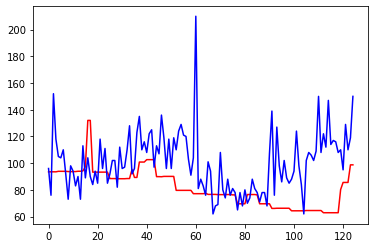

In [39]:
plt.plot(range(len(test_predict)),test_predict,color='red')
plt.plot(range(len(y_test)),y_test,color='blue')

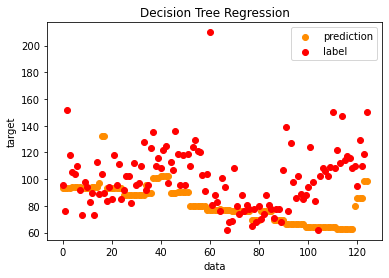

In [40]:
plt.figure()
plt.scatter(range(len(test_predict)), test_predict, c="darkorange", label="prediction")
plt.scatter(range(len(y_test)), y_test, c="red", label="label")
#plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.xlabel("data") #x軸代表data數值
plt.ylabel("target") #y軸代表target數值
plt.title("Decision Tree Regression") #標示圖片的標題
plt.legend() #繪出圖例
plt.show()

In [41]:
rmse_list2=[]


In [42]:
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_log_error
error = mean_absolute_error(y_test, test_predict)
r2_score2=r2_score(y_test, test_predict)
mean_squared_error1=mean_squared_error(y_test, test_predict)
rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print("mae: ",error)
print("mse: ",mean_squared_error1)
print("r2_score: ",r2_score2)
print("rmse: ", rmse)
rmse_list2.append(rmse)
print(rmse_list2)

mae:  22.856592102050783
mse:  968.479947753373
r2_score:  -0.9672821024375782
rmse:  31.120410468908872
[31.120410468908872]


In [ ]:
np.array(rmse_list2).mean()

8.026640463048945

In [ ]:
!python -V

Python 3.8.9


In [44]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_trains=ss.fit_transform(X_train)
X_tests=ss.fit_transform(X_test)
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_trains,y_train)

import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

forward_fs_best=sfs(estimator = svc, k_features = 'best', forward = True,verbose = 1, scoring = 'r2')
sfs_forward_best=forward_fs_best.fit(X_trains,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\User\AppData\Local\Pro

In [45]:
sfs_forward_best.k_feature_names_

('3', '7', '8', '23', '28', '30', '40', '45', '51', '57', '61')

In [57]:
new_col= []
new_col.append(df_train5.columns[3])
new_col.append(df_train5.columns[7])
new_col.append(df_train5.columns[8])
new_col.append(df_train5.columns[23])
new_col.append(df_train5.columns[28])
new_col.append(df_train5.columns[30])
new_col.append(df_train5.columns[40])
new_col.append(df_train5.columns[45])
new_col.append(df_train5.columns[51])

In [54]:
backward_fs_best=sfs(estimator = svc, k_features = 'best', forward = False,verbose =1, scoring = 'r2')
sfs_backward_best=backward_fs_best.fit(df_train4,df_label1)

c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\User\AppData\Local\Pro

In [55]:
print('R-Squared value:', sfs_backward_best.k_score_)

R-Squared value: -0.00022482532571692636


In [ ]:

from sklearn.svm import SVC
import pandas as pd
#X_trains_df=pd.DataFrame(X_train,columns=X_train.columns)
from sklearn.feature_selection import RFE
svc_lin=SVC(kernel='linear')
svm_rfe_model=RFE(estimator=svc_lin)
svm_rfe_model_fit=svm_rfe_model.fit(X_train,y_train)
feat_index = pd.Series(data = svm_rfe_model_fit.ranking_, index = df_train4.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print('Significant features from RFE',signi_feat_rfe)
print(len(signi_feat_rfe ))
print('Original number of features present in the dataset : {}'.format(df.shape[1]))
print()
print('Number of features selected by the Recursive feature selection technique is : {}'.format(len(signi_feat_rfe)))

Significant features from RFE Index(['clean_temp', 'clean_ec', 'clean_ph4', 'clean_ph7', 'clean_ph8',
       'clean_pressure12', 'clean_pressure51', 'clean_pressure62',
       'clean_pressure72', 'oven_pa2', 'oven_pb2', 'oven_a1', 'oven_a2',
       'oven_a3', 'oven_b1', 'painting_g1_act_hvc', 'painting_g2_act_a_air',
       'painting_g2_act_f_air', 'painting_g2_act_hvv', 'painting_g2_act_hvc',
       'painting_g3_act_a_air', 'painting_g3_act_f_air', 'painting_g3_act_hvv',
       'painting_g3_act_hvc', 'painting_g4_act_a_air', 'painting_g4_act_f_air',
       'painting_g4_act_hvv', 'painting_g4_act_hvc', 'painting_g5_act_a_air',
       'painting_g5_act_hvv', 'painting_g5_act_hvc', 'painting_g6_act_f_air',
       'painting_g7_act_a_air', 'painting_g8_act_a_air',
       'painting_g8_act_f_air', 'painting_g8_act_t_air', 'painting_g8_act_hvv',
       'painting_g8_act_hvc', 'painting_g9_act_a_air', 'painting_g9_act_hvv',
       'painting_g9_act_hvc', 'painting_g10_act_a_air',
       'painting

In [81]:
rfe_svm=SVC(kernel='linear') 
rfe_fit=rfe_svm.fit(X_train,y_train) 
test_pred=rfe_fit.predict(X_test)
a,b,c,d=print_evaluate(y_test, test_pred)

MAE: 10.701570680628272
MSE: 189.8324607329843
RMSE: 13.777970123823911
R2 Square 0.19865258696960741
__________________________________


In [56]:
sfs_backward_best.k_feature_names_

('clean_ec',)